#### 1. Importing Libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#### 2. Load the Dataset

In [43]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### 3. Basic Data Overveiw

In [44]:
df.shape

(418, 12)

Observation :

The dataset contains rows representing passengers and columns representing passenger attributes.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Observation :

-> Some columns like Age, Cabin and Embarked contain missing Values.

-> "Survived" is the target variable. 

In [46]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Observation:

-> Average passenger age is around 30 years.

-> Fare values show high variation, indicating outliers.

#### 4. Handling Missing values.

In [47]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Observations:

-> Age, Fare and Cabin has missing values.

-> I am going to drop "Fare", "Cabin" and "Embarked" and fill missing values of "Age" with it's median.

In [48]:
df.drop(columns=["Cabin"], inplace=True)
df.fillna({'Age': df['Age'].median()}, inplace=True)
df.drop(columns=["Embarked"], inplace=True)
df.dropna(inplace=True)

In [49]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

Observation : 

-> Now, Our dataset is clean.

#### 5. Univariate Analysis

5.1 Survival Count

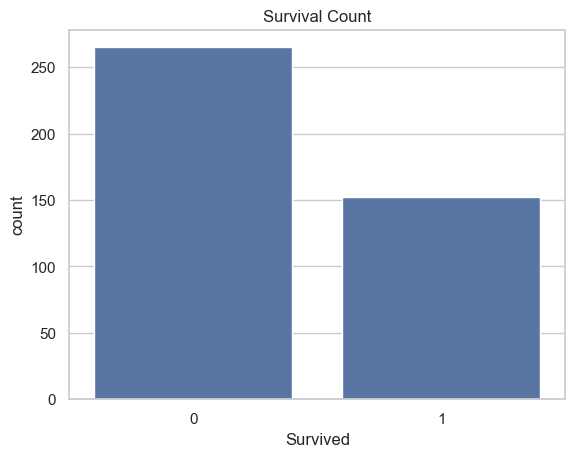

In [52]:
df['Survived'].value_counts()

sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

Observation:

-> More passenger did not survived than survived.

5.2 Gender Distribution

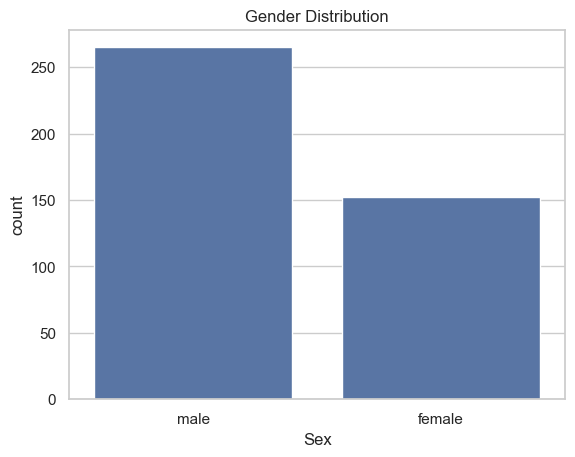

In [53]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()

Observation:

-> Male passengers were more than female passengers.

5.3 Age Distribution

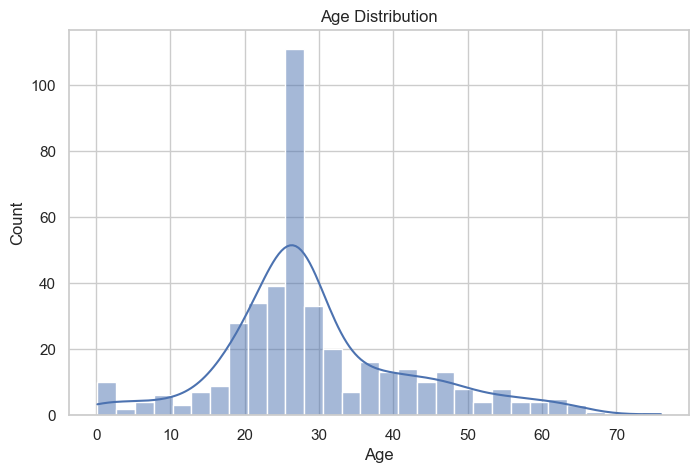

In [54]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

Observation: 

-> Most passengers were between 20 to 40 years.

#### 6. Bivariate Analysis

6.1 Survival by Gender

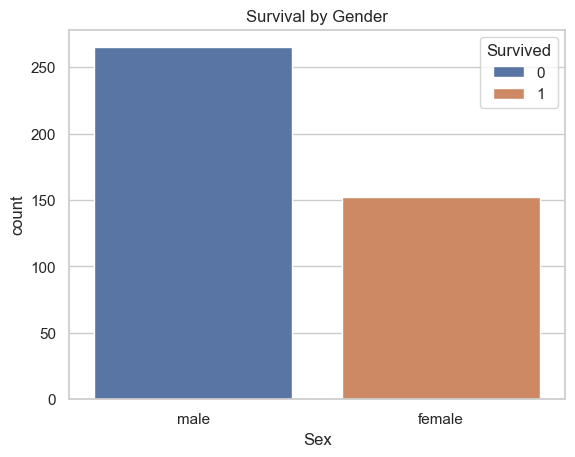

In [55]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

Observation:

-> Females had a higher survival rate than males.

6.2 Survival by Passenger Class

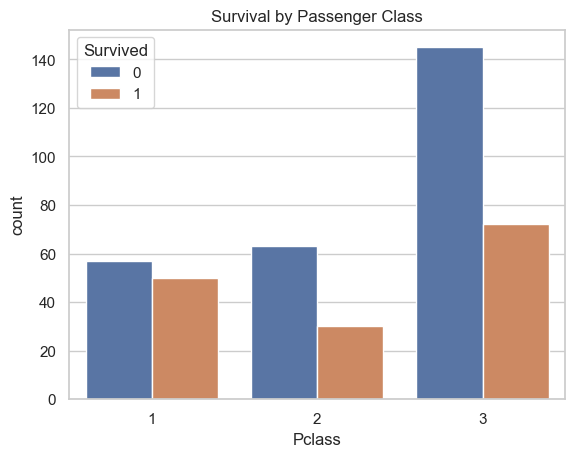

In [56]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

Observation:

-> Survivors generally paid higher fares, indicating higher-class passengers survived more

#### 7. Multivariate Analysis

7.1 Pairplot

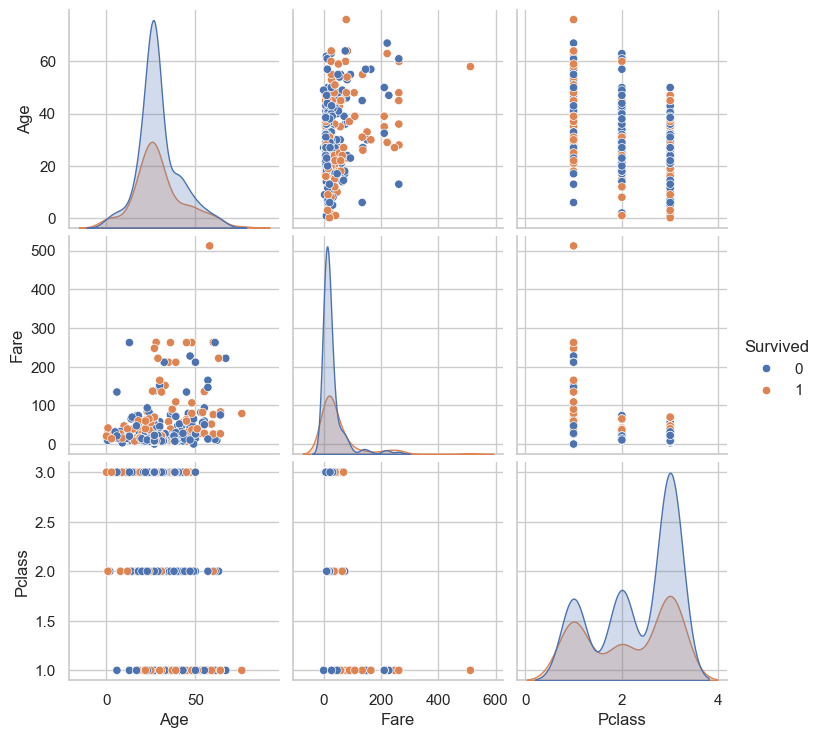

In [57]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()

Observation:

-> Survival is influenced by fare and passenger class

-> Higher fares and lower class numbers relate to survival

7.2 Correlation Heatmap

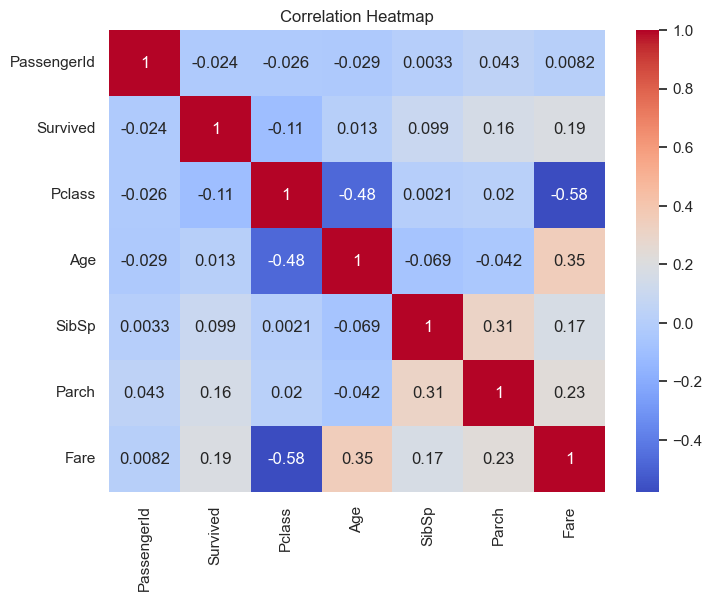

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Observation:

-> Fare has a positive correlation with survival

-> Pclass has a negative correlation with survival

#### 8. Key Insights & Findings (Summary)

🔹 Gender plays a major role: Females survived more than males

🔹 Passenger class matters: First-class passengers had higher survival rates

🔹 Fare is influential: Higher fare → better survival chances

🔹 Age impact: Children and younger passengers survived more

🔹 Socio-economic status significantly influenced survival

#### 9. Conclusion

The exploratory analysis shows that social and economic factors such as gender, class, and fare strongly influenced survival on the Titanic. Visual and statistical exploration helped uncover hidden patterns and relationships in the data.